# **Importing Libraries**

In [362]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import altair as alt

In [363]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn import svm
from sklearn import metrics

# **Loading** **dataset**

In [312]:
#downloading dataset
!gdown --id  1WUNujZKdG56QZEY98_9SpWkIXGUGYMLh

Downloading...
From: https://drive.google.com/uc?id=1WUNujZKdG56QZEY98_9SpWkIXGUGYMLh
To: /content/Ipl_dataset.zip
100% 2.58M/2.58M [00:00<00:00, 160MB/s]


In [313]:
#unzipping files
!unzip '/content/Ipl_dataset.zip' -d '/content/data'

Archive:  /content/Ipl_dataset.zip
replace /content/data/IPL Matches 2008-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/IPL Matches 2008-2020.csv  
replace /content/data/IPL Ball-by-Ball 2008-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/IPL Ball-by-Ball 2008-2020.csv  
replace /content/data/deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/deliveries.csv  
replace /content/data/matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/matches.csv  


In [314]:
#loading ball by ball dataset
df_ball_by_ball = pd.read_csv("/content/data/IPL Ball-by-Ball 2008-2020.csv")
df_ball_by_ball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [315]:
#
df_IPL_matches = pd.read_csv("/content/data/matches.csv")
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [316]:
df_deliveries = pd.read_csv("/content/data/deliveries.csv")
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [317]:
df_IPL_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [318]:
df_IPL_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [319]:
df_IPL_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#**Data Cleaning**

In [333]:
#Removing column with most null values
df_IPL_matches.drop(["umpire3"], axis = 1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,5,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,3,0,7,SPD Smith,21,A Nand Kishore,S Ravi,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,11,0,10,CA Lynn,31,Nitin Menon,CK Nandan,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,9,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,4,15,0,KM Jadhav,17,NaN,NaN,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,11347,2019,Mumbai,05/05/19,7,8,8,field,normal,0,12,0,9,HH Pandya,40,Nanda Kishore,O Nandan,0.0,0.0,0
748,11412,2019,Chennai,07/05/19,0,8,0,bat,normal,0,12,0,6,AS Yadav,18,Nigel Llong,Nitin Menon,0.0,1.0,1
749,11413,2019,Visakhapatnam,08/05/19,13,2,2,field,normal,0,6,0,2,RR Pant,0,NaN,NaN,0.0,0.0,0
750,11414,2019,Visakhapatnam,10/05/19,2,0,0,field,normal,0,0,0,6,F du Plessis,0,Sundaram Ravi,Bruce Oxenford,0.0,0.0,0


In [334]:
#Filling the values of city based on venue
conditions = [df_IPL_matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",df_IPL_matches["venue"] == "Maharashtra Cricket Association Stadium",
              df_IPL_matches["venue"] == "Saurashtra Cricket Association Stadium", df_IPL_matches["venue"] == "Holkar Cricket Stadium",
              df_IPL_matches["venue"] == "M Chinnaswamy Stadium",df_IPL_matches["venue"] == "Wankhede Stadium",
              df_IPL_matches["venue"] == "Eden Gardens",df_IPL_matches["venue"] == "Feroz Shah Kotla",
              df_IPL_matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",df_IPL_matches["venue"] == "Green Park",
              df_IPL_matches["venue"] == "Punjab Cricket Association Stadium, Mohali",df_IPL_matches["venue"] == "Dr DY Patil Sports Academy",
              df_IPL_matches["venue"] == "Sawai Mansingh Stadium", df_IPL_matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              df_IPL_matches["venue"] == "Newlands", df_IPL_matches["venue"] == "St George's Park" , 
              df_IPL_matches["venue"] == "Kingsmead", df_IPL_matches["venue"] == "SuperSport Park",
              df_IPL_matches["venue"] == "Buffalo Park", df_IPL_matches["venue"] == "New Wanderers Stadium",
              df_IPL_matches["venue"] == "De Beers Diamond Oval", df_IPL_matches["venue"] == "OUTsurance Oval", 
              df_IPL_matches["venue"] == "Brabourne Stadium",df_IPL_matches["venue"] == "Sardar Patel Stadium", 
              df_IPL_matches["venue"] == "Barabati Stadium", df_IPL_matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              df_IPL_matches["venue"] == "Himachal Pradesh Cricket Association Stadium",df_IPL_matches["venue"] == "Nehru Stadium",
              df_IPL_matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",df_IPL_matches["venue"] == "Subrata Roy Sahara Stadium",
              df_IPL_matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",df_IPL_matches["venue"] == "JSCA International Stadium Complex",
              df_IPL_matches["venue"] == "Sheikh Zayed Stadium",df_IPL_matches["venue"] == "Sharjah Cricket Stadium",
              df_IPL_matches["venue"] == "Dubai International Cricket Stadium",df_IPL_matches["venue"] == "M. A. Chidambaram Stadium",
              df_IPL_matches["venue"] == "Feroz Shah Kotla Ground",df_IPL_matches["venue"] == "M. Chinnaswamy Stadium",
              df_IPL_matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,df_IPL_matches["venue"] == "IS Bindra Stadium",df_IPL_matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
df_IPL_matches['city'] = np.where(df_IPL_matches['city'].isnull(),
                              np.select(conditions, values),
                              df_IPL_matches['city'])

#Removing records having null values in "winner" column
df_IPL_matches=df_IPL_matches[df_IPL_matches["winner"].notna()]
df_IPL_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,5,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,3,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,11,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,9,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,4,15,0,KM Jadhav,17,NaN,NaN,NaN,1.0,1.0,1


In [335]:
df_IPL_matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
team1_win            0
team1_toss_win       0
team1_bat            0
dtype: int64

In [336]:
#checking unique elements
for team in df_IPL_matches['team1'].unique():
    print(team)


13
8
4
11
12
7
3
5
0
10
1
6
9
2


In [337]:
for team in df_IPL_matches['team2'].unique():
    print(team)
## Similarly same anomaly could be found in winner & toss_winner Columns

12
11
7
5
3
13
8
4
10
0
1
9
6
2


In [338]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df_IPL_matches["team2"]=df_IPL_matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["team1"]=df_IPL_matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["winner"]=df_IPL_matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["toss_winner"]=df_IPL_matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
#####
for team in df_IPL_matches['team1'].unique():
    print(team)


13
8
4
11
12
7
3
5
0
10
1
6
9
2


In [339]:
df_IPL_matches_2 = df_IPL_matches


In [340]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_IPL_matches["team1"]=encoder.fit_transform(df_IPL_matches["team1"])
df_IPL_matches["team2"]=encoder.fit_transform(df_IPL_matches["team2"])
df_IPL_matches["winner"]=encoder.fit_transform(df_IPL_matches["winner"].astype(str))
df_IPL_matches["toss_winner"]=encoder.fit_transform(df_IPL_matches["toss_winner"])
df_IPL_matches["venue"]=encoder.fit_transform(df_IPL_matches["venue"])
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,9,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,7,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,3,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,13,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,8,15,0,KM Jadhav,17,NaN,NaN,NaN,1.0,1.0,1


In [341]:
#outcome variable team1_win as a probability of team1 winning the match
df_IPL_matches.loc[df_IPL_matches["winner"]==df_IPL_matches["team1"],"team1_win"]=1
df_IPL_matches.loc[df_IPL_matches["winner"]!=df_IPL_matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
df_IPL_matches.loc[df_IPL_matches["toss_winner"]==df_IPL_matches["team1"],"team1_toss_win"]=1
df_IPL_matches.loc[df_IPL_matches["toss_winner"]!=df_IPL_matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
df_IPL_matches["team1_bat"]=0
df_IPL_matches.loc[(df_IPL_matches["team1_toss_win"]==1) & (df_IPL_matches["toss_decision"]=="bat"),"team1_bat"]=1
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,9,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,0.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,7,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,3,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,13,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,8,15,0,KM Jadhav,17,NaN,NaN,NaN,0.0,1.0,1


In [342]:
# resetting index values
df_IPL_matches= df_IPL_matches.reset_index(drop=True)
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,9,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,0.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,7,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,3,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,13,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,8,15,0,KM Jadhav,17,NaN,NaN,NaN,0.0,1.0,1


In [343]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_IPL_matches["team1"]=encoder.fit_transform(df_IPL_matches["team1"])
df_IPL_matches["team2"]=encoder.fit_transform(df_IPL_matches["team2"])
df_IPL_matches["winner"]=encoder.fit_transform(df_IPL_matches["winner"].astype(str))
df_IPL_matches["toss_winner"]=encoder.fit_transform(df_IPL_matches["toss_winner"])
df_IPL_matches["venue"]=encoder.fit_transform(df_IPL_matches["venue"])
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,NaN,0.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,11,0,7,SPD Smith,21,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,7,0,10,CA Lynn,31,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,5,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,12,3,12,bat,normal,0,12,15,0,KM Jadhav,17,NaN,NaN,NaN,0.0,1.0,1


# **Predicting Winner of the match( Classification Analysis)**

In [344]:
#dataframe of related features
prediction_df=df_IPL_matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

In [345]:
X = prediction_df.drop([ 'team1_win'], axis=1)
X

,team1,team2,team1_toss_win,team1_bat,venue
0,13,12,0.0,0,28
1,8,11,0.0,0,21
2,4,7,0.0,0,31
3,11,5,0.0,0,13
4,12,3,1.0,1,17
...,...,...,...,...,...
747,7,8,0.0,0,40
748,0,8,1.0,1,18
749,13,2,0.0,0,0
750,2,0,0.0,0,0


In [346]:
y = prediction_df['team1_win']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
747    0.0
748    0.0
749    0.0
750    0.0
751    0.0
Name: team1_win, Length: 752, dtype: float64

In [347]:
X.shape

(752, 5)

In [348]:
y.shape

(752,)

In [349]:
# Data Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 0.92307692, 0.        , 0.        , 0.7       ],
       [0.61538462, 0.84615385, 0.        , 0.        , 0.525     ],
       [0.30769231, 0.53846154, 0.        , 0.        , 0.775     ],
       ...,
       [1.        , 0.15384615, 0.        , 0.        , 0.        ],
       [0.15384615, 0.        , 0.        , 0.        , 0.        ],
       [0.61538462, 0.        , 1.        , 1.        , 0.725     ]])

In [350]:
scaler.data_max_

array([13., 13.,  1.,  1., 40.])

In [351]:
scaler.data_min_

array([0., 0., 0., 0., 0.])

In [352]:
y = y.values.reshape(-1,1)
y.shape


(752, 1)

In [353]:
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [354]:
# data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size = 0.2)

In [355]:
X_train.shape

(601, 5)

In [356]:
X_test.shape

(151, 5)

In [357]:
y_train.shape

(601, 1)

In [358]:
y_test.shape

(151, 1)

In [359]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel())
y_pred_logreg = logreg.predict(X_test)
print('Rmse Accuracy of Logistic Regression Classifier on test set for predicting the winner of the match: {:.4f}'.format(logreg.score(X_test, y_test)))
print('classical Accuracy of Logistic Regression Classifier on test set for predicting the winner of the match:' , np.sqrt(mean_squared_error(y_test, y_pred_logreg))*100 ,"%")




Rmse Accuracy of Logistic Regression Classifier on test set for predicting the winner of the match: 0.8874
classical Accuracy of Logistic Regression Classifier on test set for predicting the winner of the match: 33.55335772422093 %


In [360]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train.ravel())
y_pred_dtree = dtree.predict(X_test)
print('Rmse Accuracy of Decision Tree Classifier on test set for predicting the winner of the match: {:.4f}'.format(dtree.score(X_test, y_test)))
print('classical Accuracy of Decision Tree Classifier on test set for predicting the winner of the match:' , np.sqrt(mean_squared_error(y_test, y_pred_dtree))*100 ,"%")

Rmse Accuracy of Decision Tree Classifier on test set for predicting the winner of the match: 0.8742
classical Accuracy of Decision Tree Classifier on test set for predicting the winner of the match: 35.472216532032 %


In [364]:
#sVM
svm = svm.SVC()
svm.fit(X_train,y_train.ravel())
y_pred_svm = svm.predict(X_test)
print('R squared value of sVM Classifier on test set for predicting the winner of the match: {:.4f}'.format(svm.score(X_test, y_test)))
print('classical Accuracy of sVM Classifier on test set for predicting the winner of the match:' , np.sqrt(mean_squared_error(y_test, y_pred_svm))*100 ,"%")


R squared value of sVM Classifier on test set for predicting the winner of the match: 0.8609
classical Accuracy of sVM Classifier on test set for predicting the winner of the match: 37.29247212000288 %


In [365]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train.ravel())
y_pred_randomForest = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set for predicting the winner of the match: {:.4f}'.format(randomForest.score(X_test, y_test)))
print('classical Accuracy of Random Forest Classifier on test set for predicting the winner of the match:' , np.sqrt(mean_squared_error(y_test, y_pred_randomForest))*100 , "%")

Accuracy of Random Forest Classifier on test set for predicting the winner of the match: 0.8808
classical Accuracy of Random Forest Classifier on test set for predicting the winner of the match: 34.526120258906154 %


# **Predicting Final Score of the match(Regression Analysis)**

In [372]:
!gdown --id  1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT

Downloading...
From: https://drive.google.com/uc?id=1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT
To: /content/ipl.csv
100% 9.48M/9.48M [00:00<00:00, 88.5MB/s]


In [373]:
dataset = pd.read_csv('/content/ipl.csv')
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [374]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
dataset["bowl_team"]=encoder.fit_transform(dataset["bowl_team"])
dataset["bat_team"]=encoder.fit_transform(dataset["bat_team"])
dataset["bowler"]=encoder.fit_transform(dataset["bowler"])
dataset["batsman"]=encoder.fit_transform(dataset["batsman"])
dataset["venue"]=encoder.fit_transform(dataset["venue"])
dataset.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,14,6,12,61,201,2,0,0.4,2,0,0,0,222


In [375]:
X_1 = dataset.copy()
X_1 = X_1.drop(["mid" , "date" , "runs_last_5" , "wickets_last_5"] , axis = 1)
X_1

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non-striker,total
0,14,6,12,328,201,1,0,0.1,0,0,222
1,14,6,12,61,201,1,0,0.2,0,0,222
2,14,6,12,61,201,2,0,0.2,0,0,222
3,14,6,12,61,201,2,0,0.3,0,0,222
4,14,6,12,61,201,2,0,0.4,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...
76009,23,7,10,172,96,121,7,19.2,40,12,129
76010,23,7,10,172,96,127,7,19.3,46,12,129
76011,23,7,10,172,96,128,7,19.4,47,12,129
76012,23,7,10,215,96,129,7,19.5,47,13,129


In [376]:
y_1 = dataset["total"]
y_1 

0        222
1        222
2        222
3        222
4        222
        ... 
76009    129
76010    129
76011    129
76012    129
76013    129
Name: total, Length: 76014, dtype: int64

In [377]:
X_1.shape

(76014, 11)

In [378]:
y_1.shape

(76014,)

In [379]:
# Data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)
X_scaled

array([[-0.36798967,  0.0163464 ,  1.49480527, ..., -1.24316513,
        -0.82155958,  2.08912218],
       [-0.36798967,  0.0163464 ,  1.49480527, ..., -1.24316513,
        -0.82155958,  2.08912218],
       [-0.36798967,  0.0163464 ,  1.49480527, ..., -1.24316513,
        -0.82155958,  2.08912218],
       ...,
       [ 0.57040744,  0.25832408,  0.99046599, ...,  1.09751663,
         0.28999704, -1.09079568],
       [ 0.57040744,  0.25832408,  0.99046599, ...,  1.09751663,
         0.38262676, -1.09079568],
       [ 0.57040744,  0.25832408,  0.99046599, ...,  1.09751663,
         0.38262676, -1.09079568]])

In [380]:
y_1 = y_1.values.reshape(-1,1)
y_1.shape


(76014, 1)

In [381]:
y_scaled = scaler.fit_transform(y_1)
y_scaled

array([[ 2.08912218],
       [ 2.08912218],
       [ 2.08912218],
       ...,
       [-1.09079568],
       [-1.09079568],
       [-1.09079568]])

In [382]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size = 0.2)

In [383]:
X_train.shape

(60811, 11)

In [384]:
X_test.shape

(15203, 11)

In [385]:
y_train.shape

(60811, 1)

In [386]:
y_test.shape

(15203, 1)

In [387]:
#GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
              #"n_estimators": [200,300],
              "learning_rate": [0.25,0.5,0.75],
              "max_depth": [10,14,18],           
             }         
gr_rf = GridSearchCV(GradientBoostingRegressor(),param_grid_rf,cv=5,verbose=2)
gr_rf.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  10.3s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  10.0s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  10.0s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=  10.0s
[CV] END ...................learning_rate=0.25, max_depth=10; total time=   9.9s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  10.0s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  10.4s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  10.1s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=   9.9s
[CV] END ...................learning_rate=0.25, max_depth=14; total time=  10.1s
[CV] END ...................learning_rate=0.25, max_depth=18; total time=  10.2s
[CV] END ...................learning_rate=0.25, m

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.25, 0.5, 0.75],
                         'max_depth': [10, 14, 18]},
             verbose=2)

In [388]:
rf_best = GradientBoostingRegressor(random_state=300,
                                    n_estimators =5000,
                                    learning_rate=gr_rf.best_params_['learning_rate'],
                                    max_depth = gr_rf.best_params_['max_depth'],
                                    )
rf_best.fit(X_train,y_train.ravel())
y_pred = rf_best.predict(X_test)
print('R-square value/accuracy :' , r2_score(y_test.ravel(), y_pred)*100 , "%")


R-square value/accuracy : 99.99999999999997 %


[]

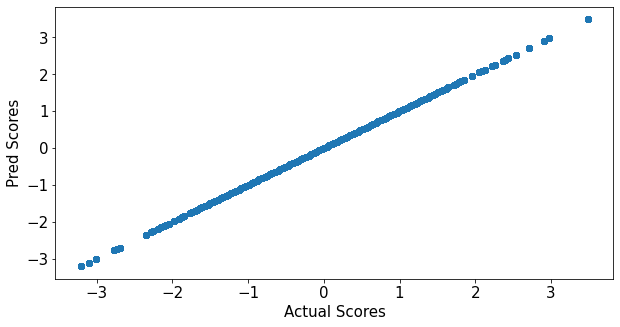

In [389]:
# Plotting graphs between actual scores and predicted scores to observe the accuracy
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

In [390]:
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_rf2 = {
              "n_estimators": [100,300,500],
              "max_depth": [10,50,100],           
             }         
gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
gr_rf2.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 50, 100],
                         'n_estimators': [100, 300, 500]})

In [391]:
rf_best2 = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=gr_rf2.best_params_['n_estimators'],
                                    max_depth = gr_rf2.best_params_['max_depth'],
                                    )
rf_best2.fit(X_train,y_train)
y_pred = rf_best2.predict(X_test)
print('R-square value/accuracy :' , r2_score(y_test.ravel(), y_pred)*100 , "%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R-square value/accuracy : 100.0 %


[]

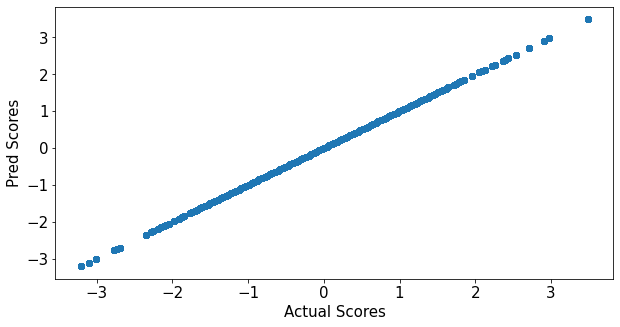

In [392]:
# Plotting graphs between actual scores and predicted scores to observe the accuracy
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

# **Cluster Analysis for batsman**

In [ ]:
batting_df= df_ball_by_ball[['batsman','bowler','batsman_runs','ball','player_dismissed']]
batting_df

,batsman,bowler,batsman_runs,ball,player_dismissed
0,RT Ponting,AA Noffke,1,5,NaN
1,BB McCullum,AA Noffke,1,6,NaN
2,BB McCullum,Z Khan,0,1,NaN
3,BB McCullum,Z Khan,1,2,NaN
4,RT Ponting,Z Khan,1,3,NaN
...,...,...,...,...,...
193463,RR Pant,NM Coulter-Nile,0,5,NaN
193464,RR Pant,NM Coulter-Nile,1,6,NaN
193465,RR Pant,KH Pandya,0,1,NaN
193466,RR Pant,KH Pandya,1,2,NaN


In [ ]:
# Counting actual dismissals since a player could get out by a run out/retired hurt
dis=list(batting_df['batsman']==batting_df['player_dismissed'])
batting_df['dismissed']=dis
batting_df

,batsman,bowler,batsman_runs,ball,player_dismissed,dismissed
0,RT Ponting,AA Noffke,1,5,NaN,False
1,BB McCullum,AA Noffke,1,6,NaN,False
2,BB McCullum,Z Khan,0,1,NaN,False
3,BB McCullum,Z Khan,1,2,NaN,False
4,RT Ponting,Z Khan,1,3,NaN,False
...,...,...,...,...,...,...
193463,RR Pant,NM Coulter-Nile,0,5,NaN,False
193464,RR Pant,NM Coulter-Nile,1,6,NaN,False
193465,RR Pant,KH Pandya,0,1,NaN,False
193466,RR Pant,KH Pandya,1,2,NaN,False


In [ ]:
# Counting Boundaries Hit 
batting_df['is_boundary']=False
batting_df['is_boundary'].loc[(batting_df['batsman_runs']==4)|(batting_df['batsman_runs']==6)]=batting_df['batsman_runs']

batting_df.loc[(batting_df['batsman_runs']==4)|(batting_df['batsman_runs']==6)]

,batsman,bowler,batsman_runs,ball,player_dismissed,dismissed,is_boundary
18,BB McCullum,SB Joshi,6,5,NaN,False,6
21,RT Ponting,JH Kallis,4,2,NaN,False,4
23,RT Ponting,JH Kallis,6,4,NaN,False,6
27,BB McCullum,SB Joshi,6,2,NaN,False,6
33,BB McCullum,JH Kallis,4,2,NaN,False,4
...,...,...,...,...,...,...,...
193420,SS Iyer,NM Coulter-Nile,4,5,NaN,False,4
193441,RR Pant,KH Pandya,6,2,NaN,False,6
193444,RR Pant,KH Pandya,6,5,NaN,False,6
193454,RR Pant,KA Pollard,4,3,NaN,False,4


In [ ]:
# Grouping our data to get each batsmen overall performance
batting_record=batting_df.groupby(['batsman'])
batting_record=batting_record.agg({'batsman_runs':'sum','ball':'count','dismissed':'sum','is_boundary':'sum'}).reset_index()
batting_record['Batting Average']=(batting_record['batsman_runs'])/(batting_record['dismissed'])
batting_record['Batting Strike Rate']=(100*batting_record['batsman_runs'])/(batting_record['ball'])
# For those who have not got out, we will give them the total runs they have scored as their batting average
for i in range(0,len(batting_record)):
    if batting_record['Batting Average'][i]==float('inf'): 
        batting_record['Batting Average'][i]=batting_record['batsman_runs'][i]
# Lets also create a column to count the percentage of runs that have come from boundaries
batting_record=batting_record.query('batsman_runs != 0')
batting_record['Percentage of Boundary']=(100*batting_record['is_boundary'])/(batting_record['batsman_runs'])

In [ ]:
# Batting Df
batting_record.rename(columns={'batsman':'player','batsman_runs':'runs_scored','ball':'balls_faced','Percentage of Boundary':'Boundaries %'},inplace=True)
bat_cols=list(batting_record.columns[1:])

In [ ]:
batting_record.isnull().sum()

player                 0
runs_scored            0
balls_faced            0
dismissed              0
is_boundary            0
Batting Average        0
Batting Strike Rate    0
Boundaries %           0
dtype: int64

In [ ]:
# Applying K-Means Clustering Algorithm
from sklearn.cluster import KMeans
num_clusters=4
kmeans=KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(batting_record.drop(columns=['player']))
batting_record['Cluster']=kmeans.labels_

In [ ]:
batting_record.Cluster.unique()

array([0, 2, 3, 1], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



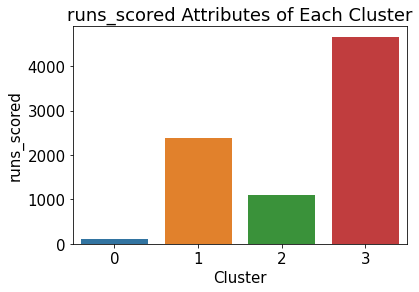

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



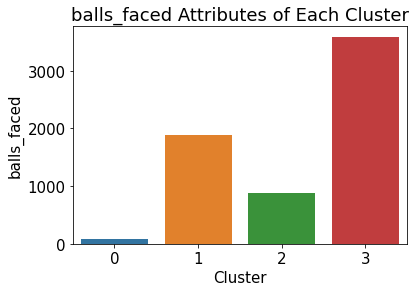

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



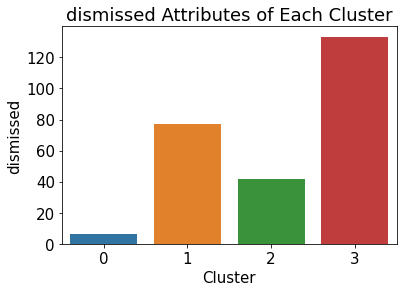

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



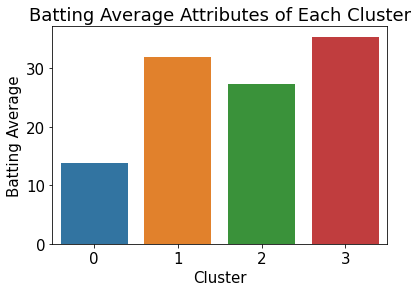

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



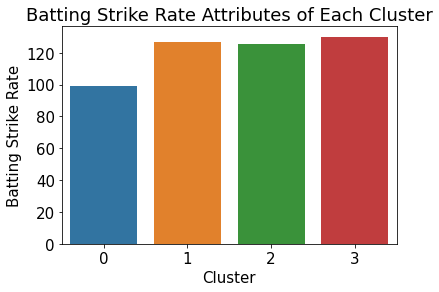

In [ ]:
# Lets Investigate Each Cluster 
cluster_df=batting_record.groupby(['Cluster']).mean().reset_index()
cols=list(cluster_df.columns[1:])
for col in cols:
    sns.barplot(cluster_df['Cluster'],cluster_df[col])
    plt.ylabel(col)
    plt.xlabel('Cluster')
    plt.title('{} Attributes of Each Cluster'.format(col))
    plt.show()

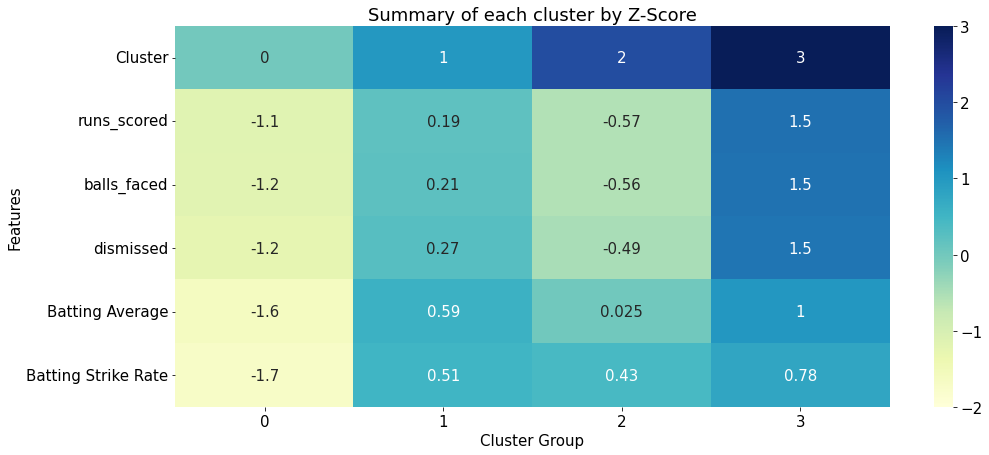

In [ ]:
# Heatmap for each cluster
# First lets standardise each variable so we can easily compare the groups
# We will do this using the z-score 
from scipy import stats
cluster_df[cols]=cluster_df[cols].apply(stats.zscore)
cluster_df
f,ax=plt.subplots(figsize=(16,7))
rows=cluster_df.T
sns.heatmap(rows,annot=True,cmap="YlGnBu",vmin=-2,vmax=3)
plt.ylabel('Features')
plt.xlabel('Cluster Group')
plt.title('Summary of each cluster by Z-Score')
plt.show()

In [ ]:
# Let's get a snapshot of each group's players 
for i in range(0,num_clusters):
    row=batting_record['player'][batting_record['Cluster']==i].reset_index()
    random_subset = row.sample(n=5,random_state=0)
    print('Example of Players in Cluster {}: {}'.format(i,list(random_subset['player'])))

Example of Players in Cluster 0: ['Y Gnaneswara Rao', 'K Goel', 'MJ Santner', 'UA Birla', 'RR Sarwan']
Example of Players in Cluster 1: ['BB McCullum', 'SE Marsh', 'SS Iyer', 'MK Pandey', 'M Vijay']
Example of Players in Cluster 2: ['MC Henriques', 'MA Agarwal', 'NV Ojha', 'KK Nair', 'DJ Hussey']
Example of Players in Cluster 3: ['RG Sharma', 'KD Karthik', 'DA Warner', 'SK Raina', 'AT Rayudu']


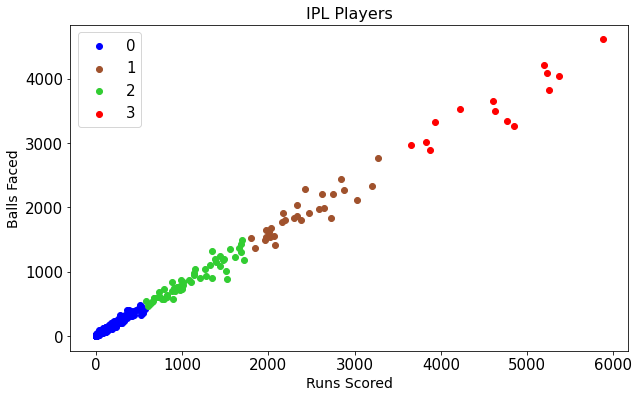

In [ ]:
# Let's do a scatter comparison
f,ax=plt.subplots(figsize=(10,6))
colors = ["blue", "sienna", "limegreen", "red", "black",'cyan']
for r in range(0,num_clusters):
    clustered_players = batting_record[batting_record["Cluster"] == r]
    plt.scatter(clustered_players["runs_scored"],clustered_players["balls_faced"], color=colors[r],label=r)
plt.title("IPL Players", fontsize=16)
plt.xlabel("Runs Scored", fontsize=14)
plt.ylabel("Balls Faced", fontsize=14)
plt.legend() 
plt.show()

In [ ]:
# Summary of player and cluster
player_db=batting_record[['player','Cluster']]
cluster={0:'Low Performing',1:'Hitters',2:'Mediocre Batters',
                     3:'Star Batters'}
# Let's label each group with our interpretations rather than the group number so that we can easily perform cluster analysis
player_db['Cluster_Name']=None
for i,j in cluster.items():
    player_db['Cluster_Name'].loc[player_db['Cluster']==i]=j
player_db

,player,Cluster,Cluster_Name
0,A Ashish Reddy,0,Low Performing
1,A Chandila,0,Low Performing
2,A Chopra,0,Low Performing
3,A Choudhary,0,Low Performing
4,A Dananjaya,0,Low Performing
...,...,...,...
532,YV Takawale,0,Low Performing
533,Yashpal Singh,0,Low Performing
534,Younis Khan,0,Low Performing
535,Yuvraj Singh,1,Hitters


In [ ]:
player_db.isnull().sum()

player          0
Cluster         0
Cluster_Name    0
dtype: int64

In [ ]:
potm= df_IPL_matches_2.player_of_match.value_counts()
potm_df=pd.DataFrame(potm).reset_index()
potm_df.rename(columns={'index':'player'},inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Total POTMs for Each Cluster')

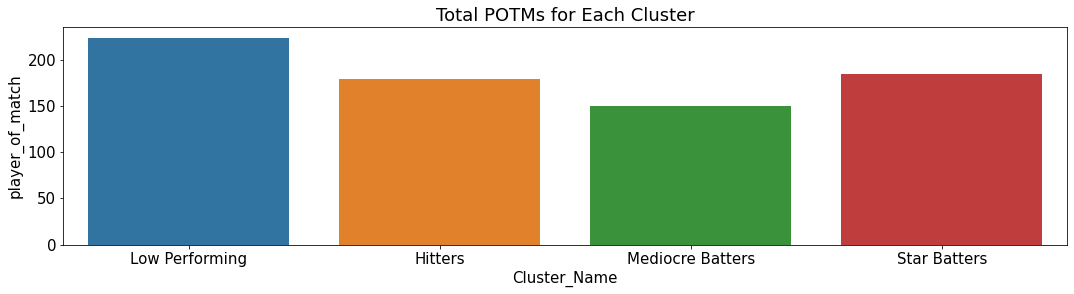

In [ ]:
# Merge the two dfs
f,ax=plt.subplots(figsize=(18,4))
potm_by_cluster=potm_df.merge(player_db,how='inner',on='player')
potm_by_cluster=potm_by_cluster.groupby(['Cluster','Cluster_Name'])['player_of_match'].sum().reset_index()
sns.barplot(potm_by_cluster['Cluster_Name'],potm_by_cluster['player_of_match'])
plt.title('Total POTMs for Each Cluster')

In [ ]:
# Look at the POTMs/Number of Players in that Cluster because cluster groups are not uniformly distributed
number=player_db['Cluster'].value_counts().reset_index().sort_values(by='index').reset_index()
number.drop(columns=['level_0'],inplace=True)
n=list(number['Cluster'].values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Average Total POTM per person in each cluster')

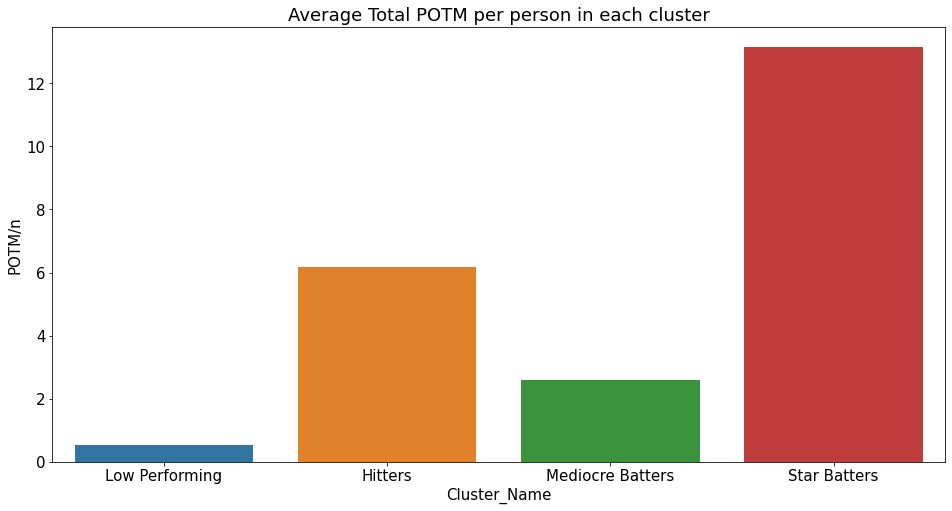

In [ ]:
# Plot this
potm_by_cluster['n']=n
potm_by_cluster['POTM/n']=potm_by_cluster['player_of_match']/potm_by_cluster['n']
f,ax=plt.subplots(figsize=(16,8))
sns.barplot(potm_by_cluster['Cluster_Name'],potm_by_cluster['POTM/n'])
plt.title('Average Total POTM per person in each cluster')

In [ ]:
# Let's look at how the number of POTM has varied over time
potm_time=df_IPL_matches_2[['season','player_of_match']]
potm_time['count']=1
potm_time=potm_time.groupby(['season','player_of_match']).sum().reset_index()
potm_time.set_index('player_of_match',inplace=True)
potm_time_by_cluster=potm_time.merge(player_db,how='inner',left_on='player_of_match',right_on='player')
potm_time_by_cluster=potm_time_by_cluster.groupby(['Cluster','Cluster_Name','season'])['count'].sum().to_frame().reset_index()
potm_time_by_cluster.set_index('Cluster_Name',inplace=True)
potm_time_by_cluster

,Cluster,season,count
Cluster_Name,,,
Low Performing,0,2008,23
Low Performing,0,2009,17
Low Performing,0,2010,17
Low Performing,0,2011,29
Low Performing,0,2012,17
Low Performing,0,2013,21
Low Performing,0,2014,16
Low Performing,0,2015,15
Low Performing,0,2016,14


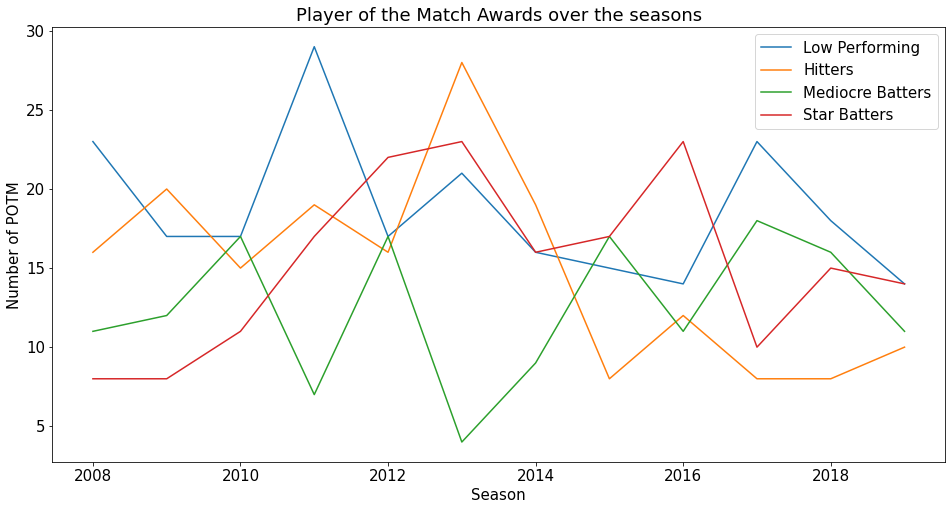

In [ ]:
# Plot our findings
f,ax=plt.subplots(figsize=(16,8))
for i in potm_time_by_cluster.index.unique():
    plt.plot(potm_time_by_cluster['season'].loc[i],potm_time_by_cluster['count'].loc[i],label=i)
    plt.xlabel('Season')
    plt.ylabel('Number of POTM')
    
plt.title('Player of the Match Awards over the seasons')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



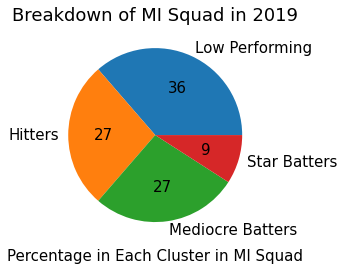

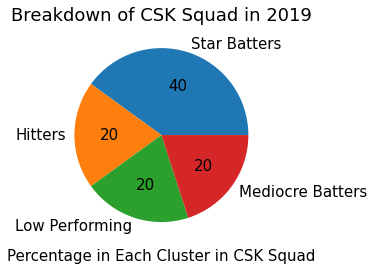

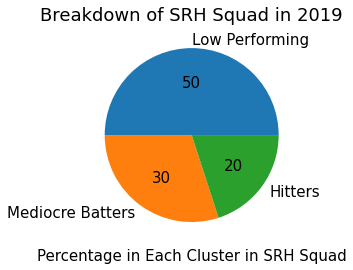

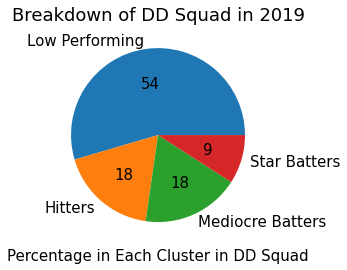

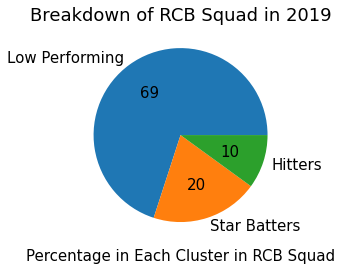

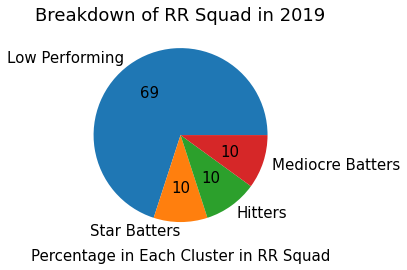

In [ ]:
# Squad Breakdown
# Let's consider the top 4 teams and the bottom 2 teams from latest IPL (2019) and the breakdown of their squad they fielded in their final game:
MI=['Q de Kock','RG Sharma','SA Yadav','Ishan Kishan','KH Pandya','KA Pollard','HH Pandya','RD Chahar','MJ McClenaghan','JJ Bumrah','SL Malinga']
CSK=['F du Plessis','SR Watson','SK Raina','AT Rayudu','MS Dhoni','DJ Bravo','RA Jadeja','SN Thakur',' DL Chahar','Harbhajan Singh','Imran Tahir']
DD=['PP Shaw','S Dhawan','C Munro','SS Iyer','RR Pant','AR Patel','SE Rutherford','KMA Paul','A Mishra','TA Boult','I Sharma']
SRH=['WP Saha','MJ Guptill','MK Pandey','KS Williamson','V Shankar','Mohammad Nabi','DJ Hooda','Rashid Khan','B Kumar','Basil Thampi','KK Ahmed']
RCB=['PA Patel','V Kohli','AB de Villiers','SO Hetmyer','Gurkeerat Singh','C de Grandhomme','Washington Sundar','UT Yadav','K Khejroliya', 'YS Chahal', 'NA Saini']
RR=['AM Rahane','LS Livingstone','SV Samson','MK Lomror','S Gopal','R Parag','STR Binny','K Gowtham','IS Sodhi','VR Aaron']
for a,t in [['MI',MI],['CSK',CSK],['SRH',SRH],['DD',DD],['RCB',RCB],['RR',RR]]:
    db=player_db.loc[player_db['player'].isin(t)]
    db=db['Cluster_Name'].value_counts().to_frame()
    plt.pie(db,labels=db.index,autopct=int)
    plt.title('Breakdown of {} Squad in 2019'.format(a))
    plt.xlabel('Percentage in Each Cluster in {} Squad'.format(a))
    plt.show()